In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score
sns.set()

In [3]:
x=np.random.normal(0,10,(10**3,2))

In [4]:
def y(x):
    norm=np.linalg.norm(x,axis=1)
    idx0=norm>10 
    idx1=(norm<=10) & (norm>5)
    idx2=norm<=5
    ypred=np.zeros(x.shape[0])
    ypred[idx0]=0
    ypred[idx1]=1
    ypred[idx2]=2
    
    return ypred

In [5]:
data=np.concatenate([x,y(x).reshape(-1,1)],axis=1)
df=pd.DataFrame(data=data,columns=['x','y','target'])
df.target=df.target.astype('int32')

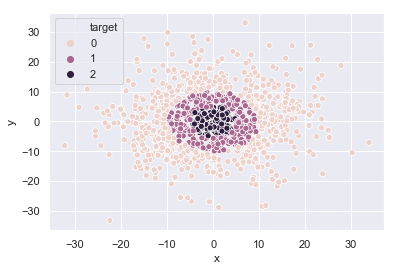

In [6]:
sns.scatterplot(data=df,x='x',y='y',hue='target')

In [7]:
class KNN:
    def __init__(self,k):
        self.k=k
        self.x=None
        self.y=None
        self.classes=None
        
    def fit(self,x,y):
        self.x=x
        classes=sorted(set(y))
        self.classes={a:b for b,a in enumerate(classes)}
        self.y=np.zeros((y.shape[0],len(classes)))
        
        for i,a in enumerate(y):
            j=self.classes[a]
            self.y[i][j]=1
    
    def __call__(self,x):
        if len(x.shape)==1:
            t=x.reshape(1,-1)
        else:
            t=x
        y_pred=np.zeros((t.shape[0],1))
        for i,z in enumerate(t):
            z=z.reshape(1,-1)
            norm=self.x-z
            norm=np.linalg.norm(norm,axis=1)
            args=np.argpartition(norm,self.k)[:self.k]
            ypred=self.y[args].mean(0)
            ypred=ypred.argmax()
            y_pred[i]=ypred
        
        return y_pred

In [8]:
knn=KNN(5)

In [9]:
knn.fit(df[['x','y']].values,df['target'].values)

In [10]:
ypred=knn(x)

In [11]:
accuracy_score(ypred,df['target'].values)

0.982

## Train Test

In [13]:
indices=np.arange(0,x.shape[0])
np.random.shuffle(indices)
l=int(0.2*x.shape[0])
xtrain=x[indices][:-l]
xtest=x[indices][-l:]

ytrain=df['target'].values[indices][:-l]
ytest=df['target'].values[indices][-l:]

In [14]:
knn.fit(xtrain,ytrain)

In [15]:
accuracy_score(ytest,knn(xtest))

0.98

# Iris dataset

In [16]:
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier

In [17]:
iris=load_iris()

In [18]:
features=iris['data']
target=iris['target']

In [32]:
indices=np.arange(0,features.shape[0])
np.random.shuffle(indices)
l=int(0.2*features.shape[0])
xtrain=features[indices][:-l]
xtest=features[indices][-l:]

ytrain=target[indices][:-l]
ytest=target[indices][-l:]

In [36]:
Kneighbor=KNeighborsClassifier(n_neighbors=30)

In [37]:
Kneighbor.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=30, p=2,
           weights='uniform')

In [38]:
knn.k=30
knn.fit(xtrain,ytrain)
accuracy_score(ytest,knn(xtest))

0.9333333333333333

In [39]:
accuracy_score(ytest,Kneighbor.predict(xtest))

0.9333333333333333

# Breast Cancer dataset

In [40]:
from sklearn.datasets import load_breast_cancer

In [41]:
bcancer=load_breast_cancer()

In [45]:
data=bcancer['data']
target=bcancer['target']

In [57]:
df_cancer=pd.DataFrame(data=np.concatenate([data,target.reshape(-1,1)],axis=1),columns=bcancer['feature_names'].tolist()+['target'])

In [54]:
len(bcancer['feature_names'])

30

In [59]:
df_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [61]:
knn.k=5

In [63]:
knn.fit(df_cancer.iloc[:,:-1].values,df_cancer['target'].values)

In [67]:
ypred=knn(df_cancer.iloc[:,:-1].values)

In [68]:
accuracy_score(ypred,df_cancer['target'].values)

0.9472759226713533

In [74]:
Kneighbor=KNeighborsClassifier(n_neighbors=5)

In [75]:
Kneighbor.fit(df_cancer.iloc[:,:-1].values,df_cancer['target'].values)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [76]:
ypred=Kneighbor.predict(df_cancer.iloc[:,:-1].values)
accuracy_score(ypred,df_cancer['target'].values)

0.9472759226713533

In [77]:
indices=np.arange(0,df_cancer.shape[0])
np.random.shuffle(indices)
l=int(0.2*df_cancer.shape[0])
xtrain=df_cancer.iloc[:,:-1].values[indices][:-l]
xtest=df_cancer.iloc[:,:-1].values[indices][-l:]

ytrain=df_cancer['target'].values[indices][:-l]
ytest=df_cancer['target'].values[indices][-l:]

In [78]:
knn.fit(xtrain,ytrain)
ypred=knn(xtest)
accuracy_score(ypred,ytest)

0.9734513274336283

In [79]:
Kneighbor.fit(xtrain,ytrain)
ypred=Kneighbor.predict(xtest)
accuracy_score(ypred,ytest)

0.9734513274336283